<a href="https://colab.research.google.com/github/sivapriya-yuga/sivapriya-yuga/blob/main/Copy_of_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOSPATIAL DATA ANALYSIS

* Weather Forcast



In [ ]:
pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.6 MB/s eta 0:00:00


In [ ]:
pip install geopandas

In [ ]:
from google.colab import files
files.upload()

Saving kivaData_augmented_sample.csv to kivaData_augmented_sample.csv


{'kivaData_augmented_sample.csv': b'region,country,latitude,longitude,id,funded_amount,loan_amount,activity,sector,use,country_code,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,location_type,latlngImputed,useforspatial,popDensity,precipitation,TimeToCity,AvgNightLight,LandClassification,Elevation,Temperature,Evaporation,Modis_LAI,Modis_EVI,soil_orgc,soil_phaq,soil_clay,soil_silt,soil_sand,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians\r\n"\xc4\x90\xc3\xb4ng S\xc6\xa1n, Thanh H\xc3\xb3a",Vietnam,19.8049755,105.6999122,1328948,50,1325,Charcoal Sales,Retail,to purchase charcoal to resell,VN,VND,121,2017-06-29 01:01:39+00:00,2017-06-04 07:00:00+00:00,,14,2,"#Parent, #Woman Owned Biz, #Repeat Borrower",female,monthly,2017-06-29,APPROXIMATE,0,1,1133.05334472656,1504.5,64,5,20,5,28,9644,11,3546,,,,,,0,0,0\r\n\xc4\x90\xc3\xb4ng V\xc4\x83n - \xc4\x90\xc3\xb4ng S\xc6\xa1n,Vietnam,19.7823

In [ ]:
import pandas as pd
from shapely.geometry import point
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
df=pd.read_csv('kivaData_augmented_sample.csv')
df

,region,country,latitude,longitude,id,funded_amount,loan_amount,activity,sector,use,...,Modis_LAI,Modis_EVI,soil_orgc,soil_phaq,soil_clay,soil_silt,soil_sand,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians
0,"Đông Sơn, Thanh Hóa",Vietnam,19.804976,105.699912,1328948,50,1325,Charcoal Sales,Retail,to purchase charcoal to resell,...,11.0,3546,NaN,NaN,NaN,NaN,NaN,0,0,0
1,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1068271,1575,1575,Farm Supplies,Agriculture,to purchase a cultivator to raise her producti...,...,12.0,2976,NaN,NaN,NaN,NaN,NaN,0,0,0
2,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1095917,1800,1800,Quarrying,Construction,to purchase supplies to maintain her quarrying...,...,12.0,2976,NaN,NaN,NaN,NaN,NaN,0,0,0
3,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1243593,1550,1550,Grocery Store,Food,"to purchase more cake, sweet, sugar and milk t...",...,12.0,2976,NaN,NaN,NaN,NaN,NaN,0,0,0
4,İZMİT,Turkey,40.765441,29.940809,1058244,300,300,Child Care,Services,to buy bunk beds.,...,NaN,1162,NaN,NaN,NaN,NaN,NaN,0,0,0
5,İZMİT,Turkey,40.765441,29.940809,1139777,275,275,Cafe,Food,to buy food materials,...,NaN,1162,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
display(df)

,region,country,latitude,longitude,id,funded_amount,loan_amount,activity,sector,use,...,Modis_LAI,Modis_EVI,soil_orgc,soil_phaq,soil_clay,soil_silt,soil_sand,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians
0,"Đông Sơn, Thanh Hóa",Vietnam,19.804976,105.699912,1328948,50,1325,Charcoal Sales,Retail,to purchase charcoal to resell,...,11.0,3546,NaN,NaN,NaN,NaN,NaN,0,0,0
1,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1068271,1575,1575,Farm Supplies,Agriculture,to purchase a cultivator to raise her producti...,...,12.0,2976,NaN,NaN,NaN,NaN,NaN,0,0,0
2,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1095917,1800,1800,Quarrying,Construction,to purchase supplies to maintain her quarrying...,...,12.0,2976,NaN,NaN,NaN,NaN,NaN,0,0,0
3,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1243593,1550,1550,Grocery Store,Food,"to purchase more cake, sweet, sugar and milk t...",...,12.0,2976,NaN,NaN,NaN,NaN,NaN,0,0,0
4,İZMİT,Turkey,40.765441,29.940809,1058244,300,300,Child Care,Services,to buy bunk beds.,...,NaN,1162,NaN,NaN,NaN,NaN,NaN,0,0,0
5,İZMİT,Turkey,40.765441,29.940809,1139777,275,275,Cafe,Food,to buy food materials,...,NaN,1162,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
df.columns

Index(['region', 'country', 'latitude', 'longitude', 'id', 'funded_amount',
       'loan_amount', 'activity', 'sector', 'use', 'country_code', 'currency',
       'partner_id', 'posted_time', 'disbursed_time', 'funded_time',
       'term_in_months', 'lender_count', 'tags', 'borrower_genders',
       'repayment_interval', 'date', 'location_type', 'latlngImputed',
       'useforspatial', 'popDensity', 'precipitation', 'TimeToCity',
       'AvgNightLight', 'LandClassification', 'Elevation', 'Temperature',
       'Evaporation', 'Modis_LAI', 'Modis_EVI', 'soil_orgc', 'soil_phaq',
       'soil_clay', 'soil_silt', 'soil_sand', 'Conflicts_total',
       'Conflicts_totalDeaths', 'Conflicts_totalDeathsCivilians'],
      dtype='object')

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

In [ ]:
gdf

,region,country,latitude,longitude,id,funded_amount,loan_amount,activity,sector,use,...,Modis_EVI,soil_orgc,soil_phaq,soil_clay,soil_silt,soil_sand,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians,geometry
0,"Đông Sơn, Thanh Hóa",Vietnam,19.804976,105.699912,1328948,50,1325,Charcoal Sales,Retail,to purchase charcoal to resell,...,3546,NaN,NaN,NaN,NaN,NaN,0,0,0,POINT (105.69991 19.80498)
1,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1068271,1575,1575,Farm Supplies,Agriculture,to purchase a cultivator to raise her producti...,...,2976,NaN,NaN,NaN,NaN,NaN,0,0,0,POINT (105.72632 19.78235)
2,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1095917,1800,1800,Quarrying,Construction,to purchase supplies to maintain her quarrying...,...,2976,NaN,NaN,NaN,NaN,NaN,0,0,0,POINT (105.72632 19.78235)
3,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1243593,1550,1550,Grocery Store,Food,"to purchase more cake, sweet, sugar and milk t...",...,2976,NaN,NaN,NaN,NaN,NaN,0,0,0,POINT (105.72632 19.78235)
4,İZMİT,Turkey,40.765441,29.940809,1058244,300,300,Child Care,Services,to buy bunk beds.,...,1162,NaN,NaN,NaN,NaN,NaN,0,0,0,POINT (29.94081 40.76544)
5,İZMİT,Turkey,40.765441,29.940809,1139777,275,275,Cafe,Food,to buy food materials,...,1162,NaN,NaN,NaN,NaN,NaN,0,0,0,POINT (29.94081 40.76544)


In [ ]:
print(gdf.head())

                region  country   latitude   longitude       id  \
0  Đông Sơn, Thanh Hóa  Vietnam  19.804976  105.699912  1328948   
1  Đông Văn - Đông Sơn  Vietnam  19.782350  105.726315  1068271   
2  Đông Văn - Đông Sơn  Vietnam  19.782350  105.726315  1095917   
3  Đông Văn - Đông Sơn  Vietnam  19.782350  105.726315  1243593   
4                İZMİT   Turkey  40.765441   29.940809  1058244   

   funded_amount  loan_amount        activity        sector  \
0             50         1325  Charcoal Sales        Retail   
1           1575         1575   Farm Supplies   Agriculture   
2           1800         1800       Quarrying  Construction   
3           1550         1550   Grocery Store          Food   
4            300          300      Child Care      Services   

                                                 use  ... Modis_EVI soil_orgc  \
0                     to purchase charcoal to resell  ...      3546       NaN   
1  to purchase a cultivator to raise her producti...  ..

In [ ]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-14-48bff38aa69a>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

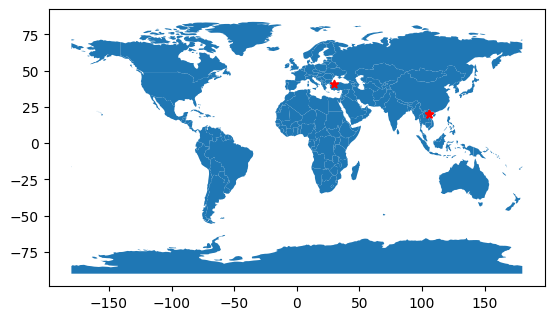

In [ ]:
gdf.plot(ax=world.plot(),marker='*',color='red',markersize=33)

<Axes: >

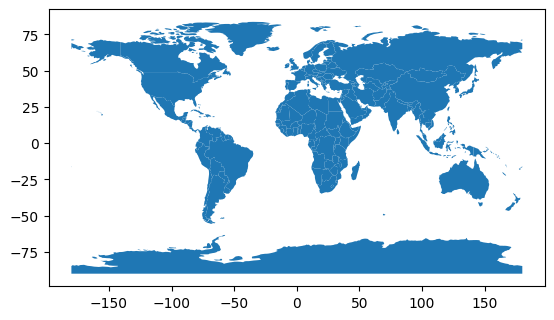

In [ ]:
gdf.plot(ax=world.plot())

<Axes: >

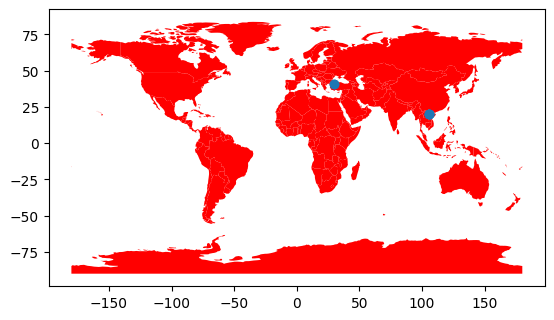

In [ ]:
gdf.plot(ax=world.plot(color='red'))

<Axes: >

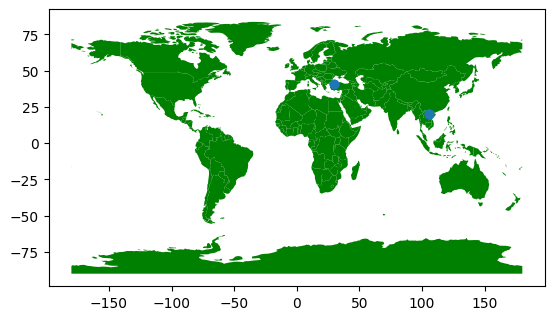

In [ ]:
gdf.plot(ax=world.plot(color='green'))

<ipython-input-20-42b70dd89ad3>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


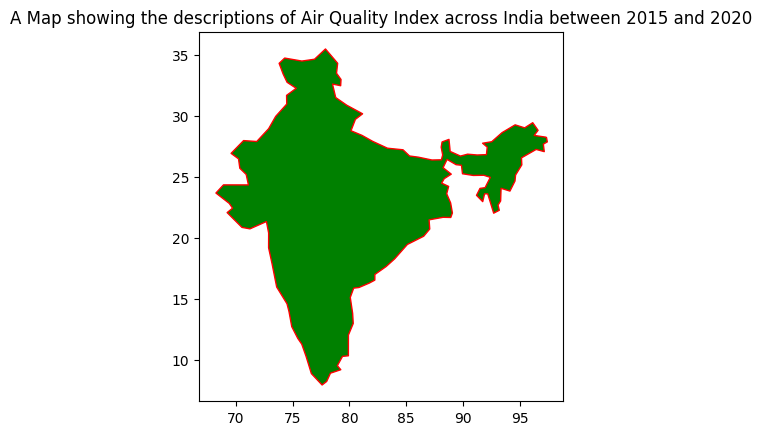

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#restricted to India.
ax = world[world.name == 'India'].plot(color='green', edgecolor='red')

plt.title("A Map showing the descriptions of Air Quality Index across India between 2015 and 2020")
plt.show()